**Nama :Sindi oktaviany**
**Nim : 2003062**

# A.Tujuan Analisis Data

tujuan analisis data Anda adalah untuk menganalisis penjualan berdasarkan produk, analisis mengenai demografi pelanggan,menganalisis kinerja cabang, analisis metode pe,bayaran, analisis harga rata - rata dan yang terakhir menganalisis tren penjualan berdasarkan bulan.

# B.Pra-proses pada dataset

In [31]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
# Nama data frame adalah df yang berisi data dari Advertising and Sales.csv
df = pd.read_csv('Supermarket_Sales.csv')

In [33]:
# Pembersihan data: Menghapus baris yang mengandung nilai yang hilang
df_cleaned = df.dropna()

# Menyimpan data yang telah dibersihkan ke file baru (opsional)
df_cleaned.to_csv('Supermarket_Sales_Bersih.csv', index=False)

In [34]:
#menampilkan data yang sudah di bersihkan
print(df_cleaned)

          Date      Payment   Invoice ID Branch       City Customer type  \
0     1/5/2019      Ewallet  750-67-8428      A     Yangon        Member   
1     3/8/2019         Cash  226-31-3081      C  Naypyitaw        Normal   
2     3/3/2019  Credit card  631-41-3108      A     Yangon        Normal   
3    1/27/2019      Ewallet  123-19-1176      A     Yangon        Member   
4     2/8/2019      Ewallet  373-73-7910      A     Yangon        Normal   
..         ...          ...          ...    ...        ...           ...   
995  1/29/2019      Ewallet  233-67-5758      C  Naypyitaw        Normal   
996   3/2/2019      Ewallet  303-96-2227      B   Mandalay        Normal   
997   2/9/2019         Cash  727-02-1313      A     Yangon        Member   
998  2/22/2019         Cash  347-56-2442      A     Yangon        Normal   
999  2/18/2019         Cash  849-09-3807      A     Yangon        Member   

     Gender            Product line  Unit price  Quantity  
0    Female       Health an

In [35]:
# Melihat 10 baris teratas dari data
df.head(10)

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7
5,3/25/2019,Ewallet,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7
6,2/25/2019,Ewallet,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6
7,2/24/2019,Ewallet,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10
8,1/10/2019,Credit card,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2
9,2/20/2019,Credit card,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3


In [36]:
# Kolom Influencer hanya memuat kategori influencer
df = pd.read_csv('Supermarket_Sales.csv', usecols=['Date','Payment','Invoice ID','Branch','City','Customer type','Gender','Product line','Unit price', 'Quantity'])
df.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [37]:
# Mengetahui jumlah kolom dan baris dari data
# Data kita mempunyai 4 kolom dengan 200 baris
df.shape

(1000, 10)

In [38]:
# Mengetahui informasi data kita dari jumlah data, tipe data , memory yang digunakan dll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [39]:
# Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,Unit price,Quantity
count,1000.000000,1000.000000
mean,55.672130,5.510000
std,26.494628,2.923431
min,10.080000,1.000000
25%,32.875000,3.000000
50%,55.230000,5.000000
75%,77.935000,8.000000
max,99.960000,10.000000


In [40]:
# Mencari dan menangani missing value
# Tidak ada missing value
df.isnull().sum()

Date             0
Payment          0
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
dtype: int64

# C.Pertanyaan Bisnis Dan Visualisasi data

Pertanyaan 1 : Bagaimana Penjualan Berdasarkan Kategori Produk?

In [41]:
# Analisis Penjualan berdasarkan Kategori Produk
product_sales = df.groupby('Product line')['Quantity'].sum()
print("\nTotal Penjualan berdasarkan Kategori Produk:")
print(product_sales)


Total Penjualan berdasarkan Kategori Produk:
Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64


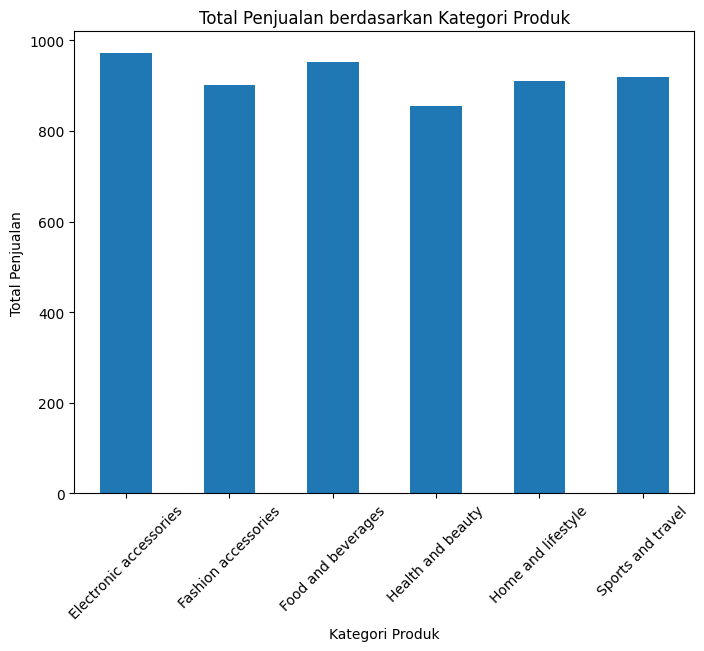

In [42]:
# Grafik Total Penjualan berdasarkan Kategori Produk
plt.figure(figsize=(8, 6))
product_sales.plot(kind='bar')
plt.title('Total Penjualan berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

Pertanyaan 2 : Bagaimana Analisis dari demografi pelanggan?

In [43]:
# Analisis Demografi Pelanggan
customer_demographics = df.groupby(['Gender', 'Customer type'])['Invoice ID'].count()
print("\nDemografi Pelanggan:")
print(customer_demographics)


Demografi Pelanggan:
Gender  Customer type
Female  Member           261
        Normal           237
Male    Member           234
        Normal           256
female  Normal             2
fml     Normal             1
male    Member             6
        Normal             3
Name: Invoice ID, dtype: int64


<Figure size 800x600 with 0 Axes>

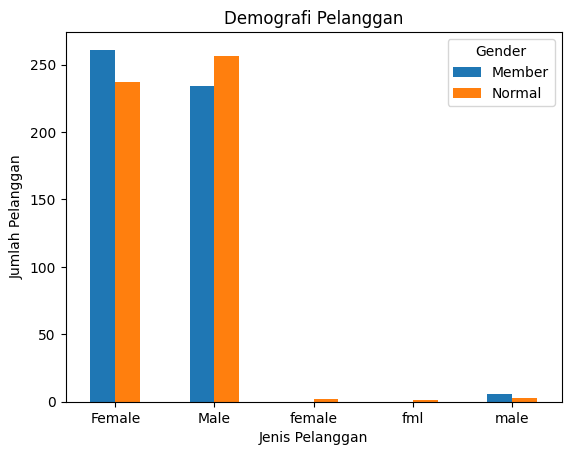

In [44]:
# Grafik Demografi Pelanggan
plt.figure(figsize=(8, 6))
customer_demographics.unstack().plot(kind='bar')
plt.title('Demografi Pelanggan')
plt.xlabel('Jenis Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

Pertanyaan 3 : Bagaimana analisis kinerja cabang?

In [45]:
# Analisis Kinerja Cabang
branch_performance = df.groupby('Branch')['Quantity'].sum()
print("\nKinerja Cabang:")
print(branch_performance)


Kinerja Cabang:
Branch
A    1859
B    1820
C    1831
Name: Quantity, dtype: int64


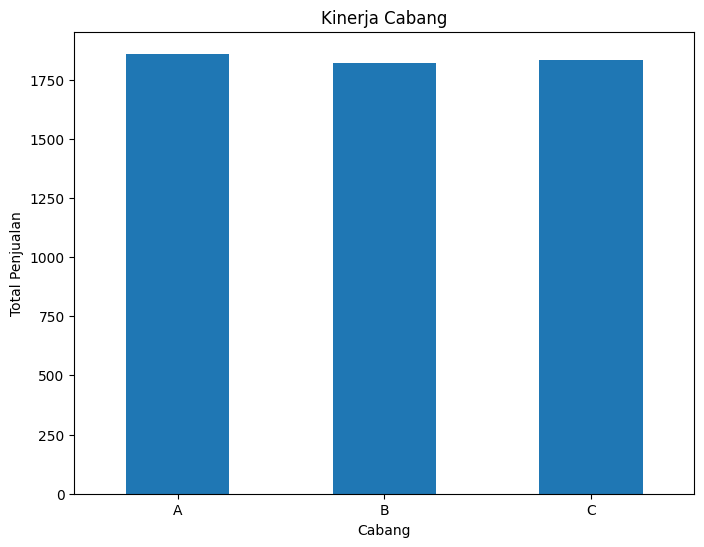

In [46]:
# Grafik Kinerja Cabang
plt.figure(figsize=(8, 6))
branch_performance.plot(kind='bar')
plt.title('Kinerja Cabang')
plt.xlabel('Cabang')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Pertanyaan 4 : Bagaimana analisis dari metode pembayaran yang banyak digunakan?

In [47]:
# Analisis Metode Pembayaran
payment_methods = df['Payment'].value_counts()
print("\nMetode Pembayaran:")
print(payment_methods)


Metode Pembayaran:
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


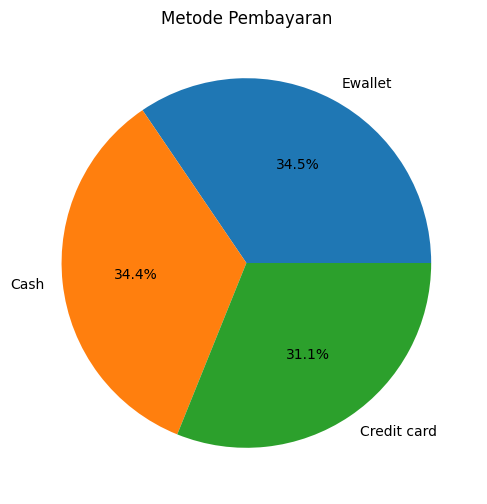

In [48]:
# Grafik Metode Pembayaran
plt.figure(figsize=(8, 6))
payment_methods.plot(kind='pie', autopct='%1.1f%%')
plt.title('Metode Pembayaran')
plt.ylabel('')
plt.show()

In [ ]:
Pertanyaan 5 : Bagaimana analisis dari harga rata-rata dari setiap produk?

In [49]:
# Analisis Harga Rata-rata
average_prices = df.groupby('Product line')['Unit price'].mean()
print("\nHarga Rata-rata berdasarkan Kategori Produk:")
print(average_prices)


Harga Rata-rata berdasarkan Kategori Produk:
Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64


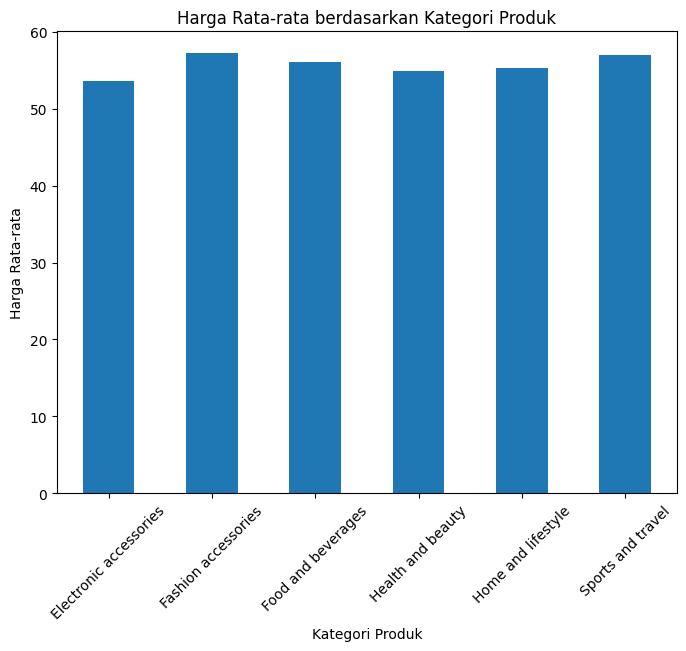

In [50]:
# Grafik Harga Rata-rata
plt.figure(figsize=(8, 6))
average_prices.plot(kind='bar')
plt.title('Harga Rata-rata berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Pertanyaan 6 : Bagaimana tren penjualan yang paling tinggi?

In [51]:
# Analisis Tren Penjualan
df['Date'] = pd.to_datetime(df['Date'])  # Mengubah kolom 'Date' menjadi tipe data datetime
df['Year'] = df['Date'].dt.year  # Menambah kolom 'Year' untuk tahun
df['Month'] = df['Date'].dt.month  # Menambah kolom 'Month' untuk bulan
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum()
print("\nTren Penjualan Bulanan:")
print(monthly_sales)


Tren Penjualan Bulanan:
Year  Month
2019  1        1965
      2        1654
      3        1891
Name: Quantity, dtype: int64


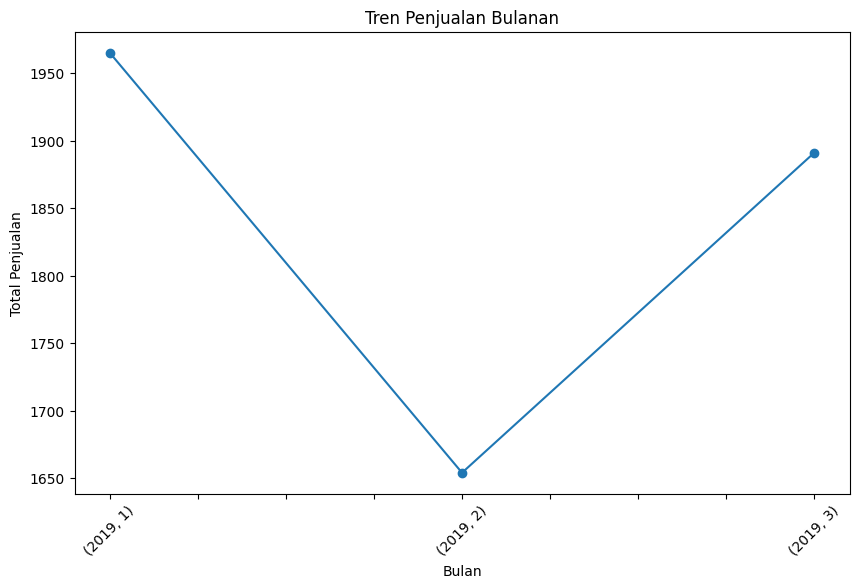

In [52]:
# Grafik Tren Penjualan Bulanan
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()